In [13]:
import numpy as np
from sksurv.linear_model import CoxPHSurvivalAnalysis
import matplotlib.pyplot as plt

In [14]:
Y = 5*np.random.rand(100) + 30
D = np.random.randint(0,2,100)

c_vec = np.array([((1-D[i]), Y[i]) for i in
                      range(len(Y))], dtype=[('e', bool), ('t', float)])

X = np.random.randn(100, 2)
mod = CoxPHSurvivalAnalysis(alpha=0.)

mod.fit(X,c_vec)

CoxPHSurvivalAnalysis(alpha=0.0)

In [15]:
Xtest = np.random.randn(100, 2)
Ytest = 5*np.random.rand(100) + 30

0.08966732693855188


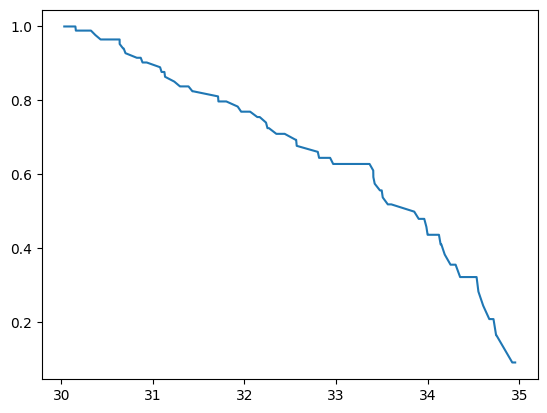

In [24]:
sfun = mod.predict_survival_function(Xtest)[2]
plt.plot(sfun.x,[sfun(x_)  for x_ in sfun.x])


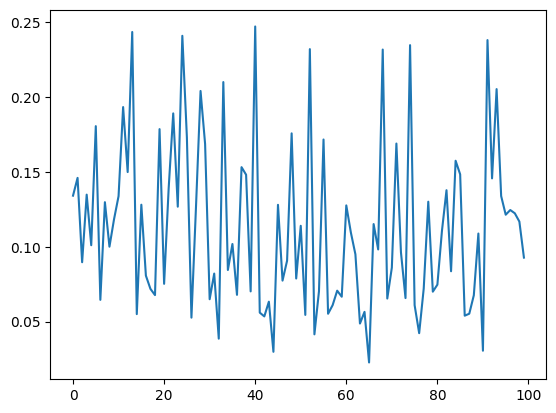

In [26]:
last_survival = []
for i in range(len(Xtest)):
    sfun = mod.predict_survival_function(Xtest)[i]
    last_survival.append(sfun(sfun.x[-1]))
plt.plot(last_survival)